In [1]:
import mlflow
import pandas as pd
from src.datasets import DATASET_FACTORY_LOOKUP
import matplotlib.pyplot as plt

In [2]:
experiment = mlflow.get_experiment("0")

In [3]:
runs = mlflow.search_runs(experiment_ids=[experiment.experiment_id])

In [4]:
runs

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.mape,metrics.smape,metrics.rmse,metrics.mae,params.params,params.n_train_points,params.model_name,params.dataset_name,tags.mlflow.user,tags.mlflow.source.name,tags.mlflow.source.type,tags.mlflow.source.git.commit
0,50137219aefd4d88ac538e9342a17531,0,FINISHED,file:///C:/Users/Gustavo-pessoal/programming/t...,2022-09-22 21:51:17.571000+00:00,2022-09-22 21:56:46.470000+00:00,3.197649,1.591784,17.233019,13.673217,"{'svr_C': 0.011103136450426, 'svr_kernel': 'li...",113,SARIMA_SVR,AIR_PASSENGERS,Gustavo-pessoal,c:/Users/Gustavo-pessoal/programming/tg/main.py,LOCAL,7b1db37d49a9b66e78882dbedd4ddf05b610cd10
1,2976d02392c54e4ebcac6b1cb1eaadf1,0,FINISHED,file:///C:/Users/Gustavo-pessoal/programming/t...,2022-06-17 18:48:47.695000+00:00,2022-06-17 18:50:16.350000+00:00,8.435347,4.251036,44.432196,36.794769,{},113,ARIMA,AIR_PASSENGERS,Gustavo-pessoal,c:/Users/Gustavo-pessoal/programming/tg/main.py,LOCAL,d81043e4abc40c9cce477363ccab2b626d8a3764
2,ab7818253a33456d8fc4cabd7fe36d9b,0,FINISHED,file:///C:/Users/Gustavo-pessoal/programming/t...,2022-06-17 18:04:51.006000+00:00,2022-06-17 18:04:51.048000+00:00,10.503250,5.207016,53.347612,45.967742,{'constant': 0},113,NAIVE,AIR_PASSENGERS,Gustavo-pessoal,c:/Users/Gustavo-pessoal/programming/tg/main.py,LOCAL,d81043e4abc40c9cce477363ccab2b626d8a3764
3,43039bf778c7400aa16c55a5c780ff85,0,FINISHED,file:///C:/Users/Gustavo-pessoal/programming/t...,2022-06-17 17:59:49.901000+00:00,2022-06-17 18:01:59.120000+00:00,3.361498,1.685313,18.524716,14.809658,{'m': 12},113,SARIMA,AIR_PASSENGERS,Gustavo-pessoal,c:/Users/Gustavo-pessoal/programming/tg/main.py,LOCAL,d81043e4abc40c9cce477363ccab2b626d8a3764
4,303ae9849ae84b558f38e7b70f4ec740,0,FINISHED,file:///C:/Users/Gustavo-pessoal/programming/t...,2022-06-17 17:56:35.338000+00:00,2022-06-17 17:58:27.998000+00:00,3.681605,1.850511,20.114102,15.572338,"{'epochs': 700, 'hidden_units': 25, 'timesteps...",113,RNN,AIR_PASSENGERS,Gustavo-pessoal,c:/Users/Gustavo-pessoal/programming/tg/main.py,LOCAL,d81043e4abc40c9cce477363ccab2b626d8a3764


In [5]:
metrics_table = runs[["params.model_name", "metrics.rmse", "metrics.mape", "metrics.smape", "metrics.mae", "params.dataset_name"]].copy()

In [6]:
metrics_table = metrics_table.rename(
    columns={
        "params.model_name": "Modelo",
        "metrics.rmse": "RMSE",
        "metrics.mae": "MAE",
        "metrics.mape": "MAPE",
        "metrics.smape": "sMAPE",
        "params.dataset_name": "Conjunto de dados"
    }
).sort_values("sMAPE")
columns_order = ["Modelo", "Conjunto de dados", "RMSE", "MAE", "MAPE", "sMAPE"]

metrics_table["Conjunto de dados"] = metrics_table["Conjunto de dados"].replace("AIR_PASSENGERS", "Passageiros aéreos")


In [9]:
_metrics_table

RMSE   MAE  MAPE  sMAPE
Conjunto de dados  Modelo                             
Passageiros aéreos SARIMA_SVR  17.2  13.7   3.2    1.6
                   SARIMA      18.5  14.8   3.4    1.7
                   RNN         20.1  15.6   3.7    1.9
                   ARIMA       44.4  36.8   8.4    4.3
                   NAIVE       53.3  46.0  10.5    5.2

In [8]:
_metrics_table = metrics_table[columns_order].round(1).set_index([ "Conjunto de dados", "Modelo"])
latex_metrics_table = _metrics_table.to_latex()
print(latex_metrics_table)

\begin{tabular}{llrrrr}
\toprule
                   &       &  RMSE &   MAE &  MAPE &  sMAPE \\
Conjunto de dados & Modelo &       &       &       &        \\
\midrule
Passageiros aéreos & SARIMA\_SVR &  17.2 &  13.7 &   3.2 &    1.6 \\
                   & SARIMA &  18.5 &  14.8 &   3.4 &    1.7 \\
                   & RNN &  20.1 &  15.6 &   3.7 &    1.9 \\
                   & ARIMA &  44.4 &  36.8 &   8.4 &    4.3 \\
                   & NAIVE &  53.3 &  46.0 &  10.5 &    5.2 \\
\bottomrule
\end{tabular}



C:\Users\Gustavo-pessoal\AppData\Local\Temp\ipykernel_108956\4068458646.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_metrics_table = _metrics_table.to_latex()


In [136]:
dataset = "AIR_PASSENGERS"
series = DATASET_FACTORY_LOOKUP[dataset]()


In [137]:
import glob

In [138]:
preds_by_model = {}
for _, row in runs[["params.model_name", "artifact_uri"]].iterrows():
    model = row["params.model_name"]
    artifact_uri = row["artifact_uri"].split("///")[-1]
    glob_pattern = f"{artifact_uri}/*.csv"
    path = glob.glob(glob_pattern)[0]
    pred = pd.read_csv(path, parse_dates=["Month"], index_col="Month")["Passengers"]
    preds_by_model[model] = pred

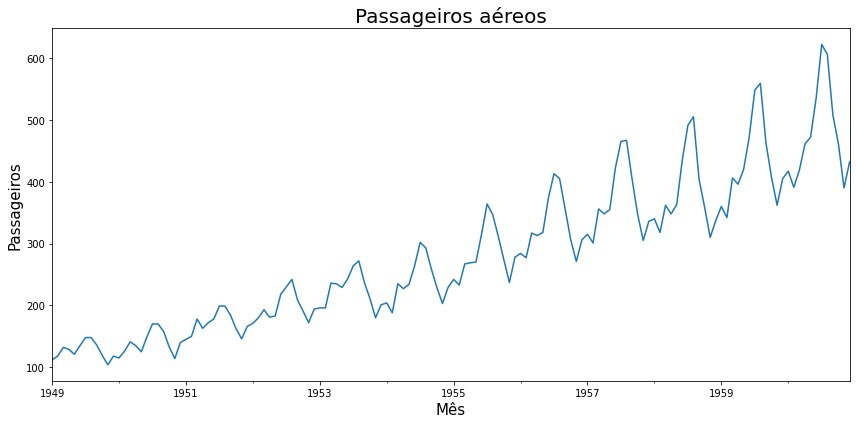

In [150]:
plt.figure(figsize=(12, 6))
series.plot()
plt.ylabel("Passageiros", fontsize=15)
plt.xlabel("Mês", fontsize=15)
plt.title("Passageiros aéreos", fontsize=20)
plt.tight_layout()
plt.savefig("air_passengers.jpg", dpi=600)
# plt.legend(fontsize=15)

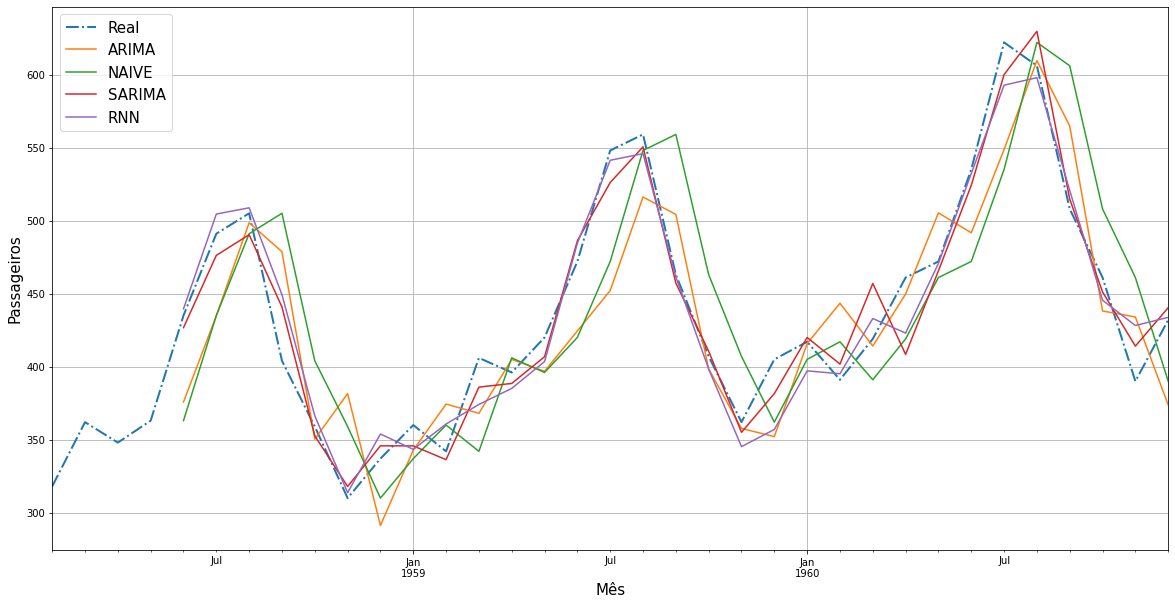

In [164]:
fig = plt.figure(figsize=(20, 10))
ax = series.tail(35).plot(label="Real", lw=2, ls="-.")

for model, pred in preds_by_model.items():
    pred.plot(label=model, ax = ax)

plt.ylabel("Passageiros", fontsize=15)
plt.xlabel("Mês", fontsize=15)
plt.legend(fontsize=15)
plt.grid()
plt.savefig("models_comparison.png")